- 노트에 적어둔 것을 구현했다.
  - 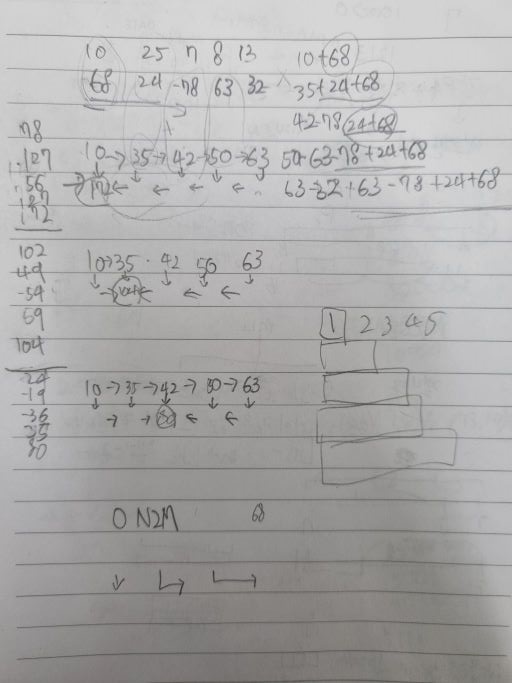

In [ ]:
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline
N, M = map(int, input().split())
G = [[*map(int, input().split())] for _ in range(M)]
acc = [[0] * (M+1) for _ in range(N)]
for i in range(N) : 
  for j in range(1, M+1) :
    acc[i][j] = acc[i][j - 1] + G[i][j-1]

DP = [[-999999999] * M for _ in range(N)]
DP[0] = acc[0][1:]
for i in range(1, N) :
  for j in range(M) : 
    for k in range(M) : #왼쪽에서 오른쪽으로 가는 경로의 개수
      left, right = sorted((k, j))
      DP[i][j] = max(DP[i][j], DP[i-1][k] + acc[i][right+1] - acc[i][left])

print(DP[N-1][M-1])

- $O(N^3)$ 풀이, 왼쪽에서 오른쪽으로 가는 횟수를 기준으로 각 행마다 값을 누적시켜서 푸는 방법.
- N과 M이 1000일경우 N^3으로 풀 순 없다. TLE
- 그러나 이 풀이에서 중복되는 부분이 매우 많은것을 알 수 있다. 

In [ ]:
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline
N, M = map(int, input().split())
G = [[*map(int, input().split())] for _ in range(N)]

DP = [[-999999999] * M for _ in range(N)]
DP[0][0] = G[0][0]
for i, v in enumerate(G[0][1:], 1) :
  DP[0][i] = DP[0][i-1] + v

for i, l in enumerate(G[1:], 1) :
  tmp = DP[i-1][:]

  for j in range(M) :
    DP[i][j] = DP[i-1][j] + l[j]
    tmp[j] += l[j]

  for j in range(1, M) : #왼쪽을 거쳐서 온 경로
    DP[i][j] = max(DP[i][j], DP[i][j-1] + l[j])

  for j in range(M-2, -1, -1) : #오른쪽을 거쳐서 온 경로
    tmp[j] = max(tmp[j], tmp[j+1] + l[j])
  
  for j in range(M) : #둘의 값을 비교한다.
    DP[i][j] = max(DP[i][j], tmp[j])

print(DP[N-1][M-1])

- 로봇이 위로가는 경우를 고려할 필요는 없으므로, 위에서부터 row마다 값을 갱신시키면 최적의 해가 나옴이 보장된다.
- G[i][j]의 값을 중복해서 더하는 것을 방지하기 위해 tmp를 만들어서 왼쪽을 거쳐서 온 경로와 오른쪽을 거쳐서 온 경로를 계산하고 그 값중에서 큰 것이 정답이된다.